# Sentiment Analysis and recommendation on Amazon's Electronics Dataset

----------------
## Purpose

EXTRACTING HEADPHONES DATA FROM ELECTRONICS DATASET AND DATA WRANGLING

## Data-Source
Amazon electronics product data:  including 5 core reviews data (5-core (1,689,188 reviews)	 and metadata(metadata (498,196 products)	from below dataset

http://jmcauley.ucsd.edu/data/amazon/

## Sample review dataset:
    "reviewerID": "A2SUAM1J3GNN3B",  
    "asin": "0000013714",  
    "reviewerName": "J. McDonald",  
    "helpful": [2, 3],  
    "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",  
    "overall": 5.0,  
    "summary": "Heavenly Highway Hymns",  
    "unixReviewTime": 1252800000,  
    "reviewTime": "09 13, 2009"  
    
 ## Sample metadata dataset:
 
    "asin" - "ID of the product, e.g. 0000031852"
    "title" - "name of the product"
    "price" - "price in US dollars (at time of crawl)"
    "imUrl" - "url of the product image"
    "related" - "related products (also bought, also viewed, bought together, buy after viewing)"
    "salesRank" - "sales rank information"
    "brand" - "brand name"
    "categories" - "list of categories the product belongs to"
  


## Preparing Amazon dataset

In [2]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db

In [3]:
##########################################
## IMPORT ELECTRONICS PRODUCT REVIEW DATA IN PANDAS
##########################################

review_df = pd.read_json('/users/hp/desktop/Ds-springboard/capstone_2/data/reviews_Electronics_5.json', orient='records', lines=True)


In [4]:
##########################################
## CHECK DATA IN PANDAS
##########################################

# change column name 
review_df = review_df.rename(columns={'overall': 'Rating'})

print ("Total data:", str(review_df.shape))
review_df.head()

Total data: (1689188, 9)


,asin,helpful,Rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400


In [5]:
##########################################
## IMPORT ELECTRONICS PRODUCT METADATA IN PANDAS
##########################################

import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

dfmeta = getDF('/users/hp/desktop/Ds-springboard/capstone_2/data/meta_Electronics.json.gz')

In [6]:
dfmeta.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [7]:
dfmeta.shape

(498196, 9)

In [8]:
##########################################
## MERGING PRODUCT REVIEW AND METADATA IN PANDAS
##########################################

product_reviews=pd.merge(review_df,dfmeta,on='asin',how='left')

In [9]:
product_reviews.head()

,asin,helpful,Rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [10]:
product_reviews.shape

(1689188, 17)

In [11]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 17 columns):
asin              1689188 non-null object
helpful           1689188 non-null object
Rating            1689188 non-null int64
reviewText        1689188 non-null object
reviewTime        1689188 non-null object
reviewerID        1689188 non-null object
reviewerName      1664458 non-null object
summary           1689188 non-null object
unixReviewTime    1689188 non-null int64
imUrl             1687975 non-null object
description       1655511 non-null object
categories        1689188 non-null object
title             1643686 non-null object
price             1639882 non-null float64
salesRank         810070 non-null object
related           1662142 non-null object
brand             954251 non-null object
dtypes: float64(1), int64(2), object(14)
memory usage: 232.0+ MB


In [10]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################

product_reviews.isnull().sum()


asin                   0
helpful                0
Rating                 0
reviewText             0
reviewTime             0
reviewerID             0
reviewerName       24730
summary                0
unixReviewTime         0
imUrl               1213
description        33677
categories             0
title              45502
price              49306
salesRank         879118
related            27046
brand             734937
dtype: int64

## Data Wrangling

In [11]:
##########################################
## DROP NULL VALUES IN PRODUCT TITLE COLUMN IN PANDAS
##########################################

product_reviews2=product_reviews.dropna(subset=['title'])

In [12]:
product_reviews2.shape

(1643686, 17)

In [13]:
product_reviews2.title.unique()

array(['Rand McNally 528881469 7-inch Intelliroute TND 700 Truck GPS',
       'Barnes &amp; Noble HDTV Adapter Kit for NOOK HD and NOOK HD+',
       'Barnes &amp; Noble OV/HB-ADP Universal Power Kit', ...,
       'Sabrent Wifi Audio Receiver (Supports DLNA and AirPlay) for Home Stereo, Portable Speakers (WF-RADU)',
       'NEW! Creative Sound Blaster Roar: Portable NFC Bluetooth Wireless Speaker with aptX/AAC. 5 Drivers, Built-in Subwoofer, Incredibly Powerful. Amazing Price of $149.99!',
       'Brainwavz S5 In Ear Headphones'], dtype=object)

In [14]:
##########################################
## EXTRACTING HEADPHONES FROM TITLE COLUMN
##########################################


product_reviews_hp = product_reviews2[product_reviews2["title"].str.contains("headphones|headphone|Headphones|Headphone")]




In [15]:
product_reviews_hp.shape

(64305, 17)

In [16]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################

product_reviews_hp.isnull().sum()


asin                  0
helpful               0
Rating                0
reviewText            0
reviewTime            0
reviewerID            0
reviewerName        783
summary               0
unixReviewTime        0
imUrl                 0
description        1431
categories            0
title                 0
price               750
salesRank         42676
related            1009
brand             22699
dtype: int64

In [17]:
product_reviews_hp[product_reviews_hp['brand'].isnull()]


,asin,helpful,Rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,imUrl,description,categories,title,price,salesRank,related,brand
1260,B00000DMA3,"[11, 11]",4,I've been using these for over a year now. Ba...,"01 4, 2005",A3UFCX1AE4TKZE,Ben,"Good sound, Good Noise Cancelling, Good for ai...",1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1261,B00000DMA3,"[12, 13]",5,I will admit that I recently gave up my Sony H...,"01 24, 2005",A33FS5H3CPDR6D,"Miguel Ali ""Film Director & Political Pundit""",Best Noise Cancelling Headphones,1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1262,B00000DMA3,"[8, 9]",3,I bought these thinking they were the ticket t...,"10 5, 2004",A1Q5M90ZZEEAL1,Niall O'Driscoll,Not what I'd hoped for.,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1263,B00000DMA3,"[0, 0]",5,I've owned these for years. I used to fly two ...,"08 24, 2004",A1N03V52IRZ5PR,"N. J. Simicich ""Gadget Geek""","The ""Get Smart"" Cone of Silence has finally be...",1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1264,B00000DMA3,"[10, 12]",5,I have used the headphones for 2 years -- they...,"06 5, 2005",A1W5G9ITZQ64TN,Stephen McLin,Great product,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1265,B00000DMA3,"[0, 0]",5,I own these and the Bose Quiet Comfort 2 ($250...,"11 10, 2009",A2ITS3FO21AYA3,"Steven Piotrowski ""Vyrus Films""",Why are some $250.00???,1257811200,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1266,B00000DMA3,"[0, 0]",3,I have owned these for over two years and wore...,"11 26, 2004",A2NJ72QP6SU0MQ,"Suziesilverado ""Suziesilverado""",Ouch- but they sound nice,1101427200,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1516,B00000J1GA,"[25, 28]",5,"I use these at work, and the sound is great an...","01 3, 2000",A2I9LWY5PN73YI,Alan G. Smith,Great Product!,946857600,http://ecx.images-amazon.com/images/I/51BQNAXN...,The Advent AW770 headphones will expand and en...,"[[Electronics, Computers & Accessories, Cables...",Audiovox Advent AW770 Wireless Headphones (Sil...,12.99,NaN,"{'also_viewed': ['B001AUPJVO', 'B009A6CZ26', '...",NaN
1517,B00000J1GA,"[0, 0]",2,[December 2000]I really like these headphones....,"12 12, 2000",A1TAFEUKHIFV6L,Amit Patel,Good headphones at first; didn't last long,976579200,http://ecx.images-amazon.com/images/I/51BQNAXN...,The Advent AW770 headphones will expand and en...,"[[Electronics, Computer

In [38]:
##########################################
## FILLING NULL VALUES IN BRAND NAME WITH FIRST WORD FROM TITLE
##########################################

product_reviews_hp.loc[product_reviews_hp.brand.isnull(),'brand'] = product_reviews_hp.title.str.split().str.get(0)


In [39]:
product_reviews_hp[product_reviews_hp['brand'].isnull()]


,asin,helpful,Rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,imUrl,description,categories,title,price,salesRank,related,brand


In [40]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################

product_reviews_hp.isnull().sum()


asin                  0
helpful               0
Rating                0
reviewText            0
reviewTime            0
reviewerID            0
reviewerName        783
summary               0
unixReviewTime        0
imUrl                 0
description        1431
categories            0
title                 0
price               750
salesRank         42676
related            1009
brand                 0
dtype: int64

In [41]:
##########################################
## DROPPING SALESRANK FROM DATASET
##########################################

product_reviews_hp2=product_reviews_hp.drop('salesRank',axis=1)


In [42]:
##########################################
## DROPPING NULL VALUE COLUMNS
##########################################

product_reviews_hp3=product_reviews_hp2.dropna(subset=['reviewerName','description','price','related'])

In [43]:
##########################################
## FINAL CHECKING FOR MISSING VALUES
##########################################

product_reviews_hp3.isnull().sum()


asin              0
helpful           0
Rating            0
reviewText        0
reviewTime        0
reviewerID        0
reviewerName      0
summary           0
unixReviewTime    0
imUrl             0
description       0
categories        0
title             0
price             0
related           0
brand             0
dtype: int64

In [44]:
product_reviews_hp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61133 entries, 1260 to 1689187
Data columns (total 16 columns):
asin              61133 non-null object
helpful           61133 non-null object
Rating            61133 non-null int64
reviewText        61133 non-null object
reviewTime        61133 non-null object
reviewerID        61133 non-null object
reviewerName      61133 non-null object
summary           61133 non-null object
unixReviewTime    61133 non-null int64
imUrl             61133 non-null object
description       61133 non-null object
categories        61133 non-null object
title             61133 non-null object
price             61133 non-null float64
related           61133 non-null object
brand             61133 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 7.9+ MB


In [45]:
product_reviews_hp3.to_csv('/users/hp/desktop/Ds-springboard/capstone_2/data/product_reviews_hp3.csv', sep=',', encoding='utf-8', index = False)


In [28]:
#product_reviews_hp3 = pd.read_csv('/users/hp/desktop/Ds-springboard/capstone_2/data/product_reviews_hp3.csv')


In [46]:
##########################################
## CONCATENATE REVIEWTEXT AND SUMMARY 
##########################################

product_reviews_hp3['review_text'] = product_reviews_hp3[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
product_reviews_hp4 = product_reviews_hp3.drop(['reviewText', 'summary'], axis = 1)
product_reviews_hp4.head()


,asin,helpful,Rating,reviewTime,reviewerID,reviewerName,unixReviewTime,imUrl,description,categories,title,price,related,brand,review_text
1260,B00000DMA3,"[11, 11]",4,"01 4, 2005",A3UFCX1AE4TKZE,Ben,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai..."
1261,B00000DMA3,"[12, 13]",5,"01 24, 2005",A33FS5H3CPDR6D,"Miguel Ali ""Film Director & Political Pundit""",1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...
1262,B00000DMA3,"[8, 9]",3,"10 5, 2004",A1Q5M90ZZEEAL1,Niall O'Driscoll,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...
1263,B00000DMA3,"[0, 0]",5,"08 24, 2004",A1N03V52IRZ5PR,"N. J. Simicich ""Gadget Geek""",1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be..."
1264,B00000DMA3,"[10, 12]",5,"06 5, 2005",A1W5G9ITZQ64TN,Stephen McLin,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...


In [47]:
product_reviews_hp4['review_text'][1263]


'The "Get Smart" Cone of Silence has finally been perfected. I\'ve owned these for years. I used to fly two round trips a week, and I wore these constantly, whether or not there was any reason to (in flight entertainment, a CD player).The first benefit is that the noise reduction made speech more audible. I could hear the person in the next seat better, and, in fact, I found that I could eavesdrop on people a row or two away, since the noise that would normally have masked their conversation was masked, but the speech came through.The loud, constant background sound in airplanes is very draining. I was more likely to be able to nap with these on, and I was more likely to be able to concentrate on reading with less background noise.Don\'t get a unit that simply insulates the sound - you might as well use earplugs or sealing earbuds. There is nothing wrong with that solution, it is just that the solution of generated countersound (exactly out of phase, exactly the right amount and freque

In [48]:
##########################################
## Split 'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it at the end
##########################################


list_positive = []
list_negative = []

for help in product_reviews_hp4['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
product_reviews_hp4['pos_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
product_reviews_hp4['neg_feedback'] = list_negative

# Drop redundant 'helpful' column
product_reviews_hp4 = product_reviews_hp4.drop('helpful', axis = 1)
product_reviews_hp4.head()

,asin,Rating,reviewTime,reviewerID,reviewerName,unixReviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback
1260,B00000DMA3,4,"01 4, 2005",A3UFCX1AE4TKZE,Ben,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0
1261,B00000DMA3,5,"01 24, 2005",A33FS5H3CPDR6D,"Miguel Ali ""Film Director & Political Pundit""",1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1
1262,B00000DMA3,3,"10 5, 2004",A1Q5M90ZZEEAL1,Niall O'Driscoll,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1
1263,B00000DMA3,5,"08 24, 2004",A1N03V52IRZ5PR,"N. J. Simicich ""Gadget Geek""",1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0
1264,B00000DMA3,5,"06 5, 2005",A1W5G9ITZQ64TN,Stephen McLin,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2


In [49]:
##########################################
## Classify ratings as good
##########################################

good_rate = len(product_reviews_hp4[product_reviews_hp4['Rating'] >= 3])
bad_rate = len(product_reviews_hp4[product_reviews_hp4['Rating'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for Heaphones products'.format(good_rate))
print ('Bad ratings : {} reviews for Headphones products'.format(bad_rate))


Good ratings : 52810 reviews for Heaphones products
Bad ratings : 8323 reviews for Headphones products


In [50]:
##########################################
# Apply the new classification to the ratings column
##########################################
product_reviews_hp4['rating_class'] = product_reviews_hp4['Rating'].apply(lambda x: 'bad' if x < 3 else'good')
product_reviews_hp4.head()

,asin,Rating,reviewTime,reviewerID,reviewerName,unixReviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class
1260,B00000DMA3,4,"01 4, 2005",A3UFCX1AE4TKZE,Ben,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good
1261,B00000DMA3,5,"01 24, 2005",A33FS5H3CPDR6D,"Miguel Ali ""Film Director & Political Pundit""",1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good
1262,B00000DMA3,3,"10 5, 2004",A1Q5M90ZZEEAL1,Niall O'Driscoll,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good
1263,B00000DMA3,5,"08 24, 2004",A1N03V52IRZ5PR,"N. J. Simicich ""Gadget Geek""",1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good
1264,B00000DMA3,5,"06 5, 2005",A1W5G9ITZQ64TN,Stephen McLin,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good


In [51]:
##########################################
# Apply the helpfullness ratio
##########################################


product_reviews_hp4['help_prop'] = product_reviews_hp4.pos_feedback.div((product_reviews_hp4.pos_feedback+product_reviews_hp4.neg_feedback), axis=0)
product_reviews_hp4


,asin,Rating,reviewTime,reviewerID,reviewerName,unixReviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class,help_prop
1260,B00000DMA3,4,"01 4, 2005",A3UFCX1AE4TKZE,Ben,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000
1261,B00000DMA3,5,"01 24, 2005",A33FS5H3CPDR6D,"Miguel Ali ""Film Director & Political Pundit""",1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077
1262,B00000DMA3,3,"10 5, 2004",A1Q5M90ZZEEAL1,Niall O'Driscoll,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889
1263,B00000DMA3,5,"08 24, 2004",A1N03V52IRZ5PR,"N. J. Simicich ""Gadget Geek""",1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,NaN
1264,B00000DMA3,5,"06 5, 2005",A1W5G9ITZQ64TN,Stephen McLin,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333
1265,B00000DMA3,5,"11 10, 2009",A2ITS3FO21AYA3,"Steven Piotrowski ""Vyrus Films""",1257811200,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Why are some $250.00??? I own these and the Bo...,0,0,good,NaN
1266,B00000DMA3,3,"11 26, 2004",A2NJ72QP6SU0MQ,"Suziesilverado ""Suziesilverado""",1101427200,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Ouch- but they sound nice I have owned these f...,0,0,good,NaN
1449,B00000J1EJ,4,"05 4, 2007",A1POGSPD4HN8Y1,"Cap'n Stoob ""Stoob""",1178236800,http://ecx.images-amazon.com/images/I/31KB75oG...,Maxell's HP-NC1 portable headphones are equipp...,"[[Electronics, Accessories & Supplies, Audio &...",Maxell Noise-Cancellation Headphones (190400),31.31,"{'also_bought': ['B0007XFGAE', 'B0002K6Y9E', '...",Maxell,"Good For Flying The sound quality is good, the...",3,0,good,1.000000
1450,B00000J1EJ,2,"11 8, 2001",A294CSQXGL76CV,David M,1005177600,http://ecx.images-amazon.com/images/I/31KB75oG...,Maxell's HP-NC1 portable headphones are equipp...,"[[Electronics, Accessories & Supplies, Audio &...",Maxell Noise-Cancellation Headphones (190400),31.31,"{'also_bought': ['B0007XFGAE', 'B0002K6Y9E', '...",Maxell,Depends on the type of noise These headphones ...,128,5,bad,0.962406
1451,B00000J1EJ,4,"01 1, 2009",A16RGMORD80K9V,DooDude,1230768000,http:/

In [52]:
##########################################
# filling helpfullness ratio NAN value with zero
##########################################

product_reviews_hp4['help_prop'].fillna(0, inplace=True)


In [53]:
##########################################
# checking duplicates based on'asin', 'reviewName' and 'unixReviewTime'columns
##########################################


product_reviews_hp4[product_reviews_hp4.duplicated(['reviewerName','unixReviewTime','asin'],keep= False)]


,asin,Rating,reviewTime,reviewerID,reviewerName,unixReviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class,help_prop
601823,B002HWJT1A,5,"12 27, 2012",A23V9XZWUFEWWX,Paul,1356566400,http://ecx.images-amazon.com/images/I/41RgSp8Y...,,"[[Electronics, Accessories & Supplies, Audio &...",Audio-Technica ATH-ANC7B QuietPoint Active Noi...,152.99,"{'also_bought': ['B000067RC4', 'B0083J7EUO', '...",Audio-Technica,excellent noise canceling Excellent sound qual...,0,0,good,0.0
601824,B002HWJT1A,5,"12 27, 2012",A2RMTTDT5Z6G86,Paul,1356566400,http://ecx.images-amazon.com/images/I/41RgSp8Y...,,"[[Electronics, Accessories & Supplies, Audio &...",Audio-Technica ATH-ANC7B QuietPoint Active Noi...,152.99,"{'also_bought': ['B000067RC4', 'B0083J7EUO', '...",Audio-Technica,Excellent value for headphones with active-noi...,0,0,good,0.0
760353,B003ELYQGG,5,"10 2, 2013",AM67VZ3Z4HUTR,Amazon Customer,1380672000,http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,Panasonic RPHJE120S In-Ear Headphones Fantasti...,0,0,good,0.0
760357,B003ELYQGG,1,"10 2, 2013",APKFIZH7HLZ6X,Amazon Customer,1380672000,http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,Flat. Tinny. No Bass I can't recommend these a...,0,0,bad,0.0
760617,B003ELYQGG,3,"07 8, 2014",A1VA4Z4B7Y74KY,Brad,1404777600,http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,Three Stars Cheap,0,0,good,0.0
760620,B003ELYQGG,5,"07 8, 2014",A2WOPG3K518RN6,Brad,1404777600,http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,"There are better sounding earphones, but you'l...",0,0,good,0.0
1670869,B00GMFYM8I,5,"04 21, 2014",A3US4KS743CHAR,Amazon Customer,1398038400,http://ecx.images-amazon.com/images/I/41-0kBLi...,"""Here's The Super Simple Way To Add The Latest...","[[Electronics, Computers & Accessories, Networ...",Mediastic USB Bluetooth Adapter - Latest V4.0 ...,14.95,"{'also_bought': ['B00GS7SKQK', 'B004YDTIP2', '...",Mediastic,Great product I have an older desktop computer...,0,0,good,0.0
1670870,B00GMFYM8I,4,"04 21, 2014",A27UJPP9SQWGDO,Amazon Customer,1398038400,http://ecx.images-amazon.com/images/I/41-0kBLi...,"""Here's The Super Simple Way To Add The Latest...","[[Electronics, Computers & Accessories, Networ...",Mediastic USB Bluetooth Adapter - Latest V4.0 ...,14.95,"{'also_bought': ['B00GS7SKQK', 'B004YDTIP2', '...",Mediastic,Great product for the price This was a fast an...,0,0,good,0.0


In [54]:
product_reviews_hp4.shape

(61133, 18)

In [55]:
##########################################
# Drop 'reviewName' and 'unixReviewTime'columns
##########################################

product_reviews_hp4 = product_reviews_hp4.drop_duplicates(['asin','reviewerName', 'unixReviewTime'], keep = 'first')


In [56]:
product_reviews_hp4.shape

(61129, 18)

In [57]:
##########################################
# Convert time object to datetime and create a new column named 'time'
##########################################
product_reviews_hp4['time'] = product_reviews_hp4.reviewTime.str.replace(',', "")
product_reviews_hp4['time'] = pd.to_datetime(product_reviews_hp4['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
product_reviews_hp4 = product_reviews_hp4.drop('reviewTime', axis = 1)
product_reviews_hp4.head()

,asin,Rating,reviewerID,reviewerName,unixReviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class,help_prop,time
1260,B00000DMA3,4,A3UFCX1AE4TKZE,Ben,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000,2005-01-04
1261,B00000DMA3,5,A33FS5H3CPDR6D,"Miguel Ali ""Film Director & Political Pundit""",1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077,2005-01-24
1262,B00000DMA3,3,A1Q5M90ZZEEAL1,Niall O'Driscoll,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889,2004-10-05
1263,B00000DMA3,5,A1N03V52IRZ5PR,"N. J. Simicich ""Gadget Geek""",1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,0.000000,2004-08-24
1264,B00000DMA3,5,A1W5G9ITZQ64TN,Stephen McLin,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333,2005-06-05


In [58]:
# Rename the columns
product_reviews_hp4.columns = ['product_id','rating','reviewer_id','reviewer_name','unix_review_time','url','description','categories','product_title','price','related','brand_name','review_text','pos_feedback', 'neg_feedback', 'rating_class', 'help_prop','review_time']

# Sample observation
product_reviews_hp4.head()


,product_id,rating,reviewer_id,reviewer_name,unix_review_time,url,description,categories,product_title,price,related,brand_name,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time
1260,B00000DMA3,4,A3UFCX1AE4TKZE,Ben,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000,2005-01-04
1261,B00000DMA3,5,A33FS5H3CPDR6D,"Miguel Ali ""Film Director & Political Pundit""",1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077,2005-01-24
1262,B00000DMA3,3,A1Q5M90ZZEEAL1,Niall O'Driscoll,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889,2004-10-05
1263,B00000DMA3,5,A1N03V52IRZ5PR,"N. J. Simicich ""Gadget Geek""",1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,0.000000,2004-08-24
1264,B00000DMA3,5,A1W5G9ITZQ64TN,Stephen McLin,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333,2005-06-05


In [59]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(product_reviews_hp4)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(product_reviews_hp4.reviewer_id.unique()))
reviewer_prop = float(len(product_reviews_hp4.reviewer_id.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(product_reviews_hp4.product_id.unique()))
product_prop = float(len(product_reviews_hp4.product_id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(product_reviews_hp4.rating.mean(),3))

### Average helpful ratio
print ("Average helpfull ratio score: ",round(product_reviews_hp4.help_prop.mean(),3))


print ("================================================")

Number of reviews:  61129

Number of unique reviewers:  42062
Prop of unique reviewers:  0.688

Number of unique products:  1878
Prop of unique products:  0.031

Average rating score:  4.056
Average helpfull ratio score:  0.351


In [60]:
product_reviews_hp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1260 to 1689187
Data columns (total 18 columns):
product_id          61129 non-null object
rating              61129 non-null int64
reviewer_id         61129 non-null object
reviewer_name       61129 non-null object
unix_review_time    61129 non-null int64
url                 61129 non-null object
description         61129 non-null object
categories          61129 non-null object
product_title       61129 non-null object
price               61129 non-null float64
related             61129 non-null object
brand_name          61129 non-null object
review_text         61129 non-null object
pos_feedback        61129 non-null int64
neg_feedback        61129 non-null int64
rating_class        61129 non-null object
help_prop           61129 non-null float64
review_time         61129 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(11)
memory usage: 8.9+ MB


In [61]:
# Read statistic summary of numeric variables
product_reviews_hp4[['rating','pos_feedback','neg_feedback','help_prop']].describe()

,rating,pos_feedback,neg_feedback,help_prop
count,61129.000000,61129.000000,61129.000000,61129.000000
mean,4.056438,3.082269,0.641709,0.350887
std,1.217506,31.516073,2.777990,0.442493
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.947368
max,5.000000,3800.000000,144.000000,1.000000


Text(0, 0.5, 'Number of Reviews')

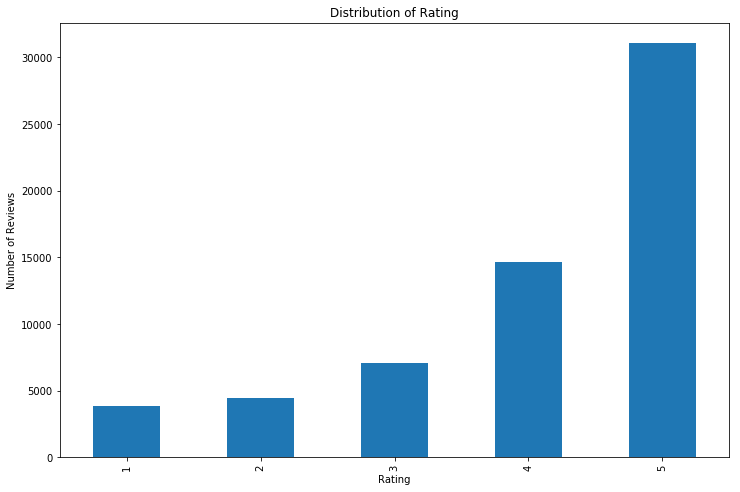

In [62]:
##########################################
## PLOT DISTRIBUTION OF RATING 
##########################################

plt.figure(figsize=(12,8))
# sns.countplot(df['Rating'])
product_reviews_hp4['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

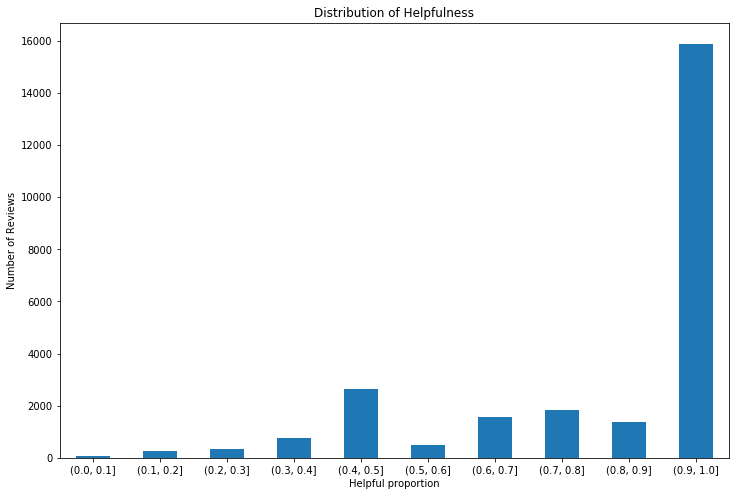

In [63]:
##########################################
## DISTRIBUTION OF HELPFULNESS
########################################## 

plt.figure(figsize=(12,8))

cutoff = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


Dist_help = product_reviews_hp4.groupby([pd.cut(product_reviews_hp4['help_prop'], bins = cutoff)]).size()
Dist_help.plot(kind='bar')

plt.title("Distribution of Helpfulness")
plt.xlabel("Helpful proportion")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()


In [64]:
##########################################
## DISTRIBUTION OF RATING SCORE
########################################## 

class_counts = product_reviews_hp4.groupby('rating').size()
class_counts

rating
1     3870
2     4452
3     7102
4    14639
5    31066
dtype: int64

In [65]:
##########################################
# Customer totals for each rating class
##########################################
product_reviews_hp4['rating_class'].value_counts()

good    52807
bad      8322
Name: rating_class, dtype: int64

In [66]:
##########################################
# Print the number of positive feedback
##########################################
pos = len(product_reviews_hp4[product_reviews_hp4['pos_feedback'] > 0])
print('Number of positive feedbacks: {}'.format(pos))

##########################################
# Print the number of negative feedback
##########################################
neg = len(product_reviews_hp4[product_reviews_hp4['neg_feedback'] > 0])      
print('\nNumber of negative feedbacks: {}'.format(neg))


Number of positive feedbacks: 25222

Number of negative feedbacks: 14202


In [67]:
product_reviews_hp5 = product_reviews_hp4[product_reviews_hp4['pos_feedback'] == 0]
product_reviews_hp6 = product_reviews_hp5[product_reviews_hp5['neg_feedback']==0]
product_reviews_hp6.shape

(32049, 18)

In [68]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(product_reviews_hp4['reviewer_id'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(product_reviews_hp4['product_id'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['reviewer_id'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['product_id'].unique()))))



Number of unique customers : 42062

Number of unique products : 1878

Review per customer: 1.4533070229660976

Review per product: 32.550053248136315


## Descriptive Statistic Summary:¶

- Rating Status:

    42062 customer gives ratings and mean of the ratings is 4.1, which means that customers prefer to give high ratings for products. Standard deviation and percentiles also show that 1 and 2 ratings for products are rare. To be able to predict the ratings reasonably, we classified them as 'good' and 'bad' above.

According to the statistics on rating stars:

    3870 customers give 1 star

    4452 customers give 2 stars

    7102 customers give 3 stars

    14639 customers give 4 stars

    31066 customers give 5 stars

    8322 customers give bad ratings

    52807 customers give good ratings

- Feedback Status

    52807 customers find the given reviews logical and totally agree with them. They give positive feedbacks. The mean 3.1 and standard deviation is 31.5 whereas the highest positive feedback number for reviews is 25222.

    8322 customers find the given reviews useless and don't agree with the them. They give negative feedbacks. The mean 0.6 and standard deviation is 0.8 whereas the highest negative feedback number for reviews is 14202.

    32049 customers don't give either positive or negative feedbacks for reviews.

- Helpfullness ratio

    mean helpfullness ratio is 0.73

    large number of reviews got high helpfulness ratio 


- Non-numeric variables statistics:

    42062 unique customers and 1878 products in this dataset. Each customers averagely give 1 review for products and on the other hand, there is averagely 32 reviews for each product in the website.


## Bag of Words¶
The goal of this project is to classify the reviews into positive and negative sentiment. There are two main steps involved. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

    Step 1 : Preprocess raw reviews to cleaned reviews
    Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn
    Step 3 : Transform review text to numerical representations (feature vectors)
    Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)
    Step 5 : Improve the model performance by GridSearch


## Text Preprocessing¶
The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.




In [69]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
import contractions
from contractions import CONTRACTION_MAP
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /Users/hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (product_reviews_hp4["review_text"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))


Number of raw tokens: 10122506


## Functions for Preprocessing¶


### Expanding Contractions¶
Contractions are shortened version of words or syllables. They exist in either written or spoken forms. Shortened versions of existing words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word.

By nature, contractions do pose a problem for NLP and text analytics because, to start with, we have a special apostrophe character in the word. Ideally, we can have a proper mapping for contractions and their corresponding expansions and then use it to expand all the contractions in our text.



### Removing Special Characters¶
One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML.



### Tokenizing Text¶
Tokenization can be defined as the process of breaking down or splitting textual data into smaller meaningful components called tokens.

Sentence tokenization is the process of splitting a text corpus into sentences that act as the first level of tokens which the corpus is comprised of. This is also known as sentence segmentation , because we try to segment the text into meaningful sentences.

Word tokenization is the process of splitting or segmenting sentences into their constituent words. A sentence is a collection of words, and with tokenization we essentially split a sentence into a list of words that can be used to reconstruct the sentence.



### Removing Stopwords¶
Stopwords are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords.



### Correcting Words¶
One of the main challenges faced in text normalization is the presence of incorrect words in the text. The definition of incorrect here covers words that have spelling mistakes as well as words with several letters repeated that do not contribute much to its overall significance.



#### Correcting Repeating Characters

#### Correcting Spellings

### Lemmatization¶
The process of lemmatization is to remove word affixes to get to a base form of the word. The base form is also known as the root word, or the lemma, will always be present in the dictionary.



In [72]:
import re, string, unicodedata
import nltk
import contractions
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from contractions import CONTRACTION_MAP


In [78]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text



# Define function to expand contractions
def expand_contractions(text):
    contractions_pattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = CONTRACTION_MAP.get(match)\
                        if CONTRACTION_MAP.get(match)\
                        else CONTRACTION_MAP.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
#stopword_list.remove('headphone')
#stopword_list.remove('headphones')
#stopword_list.remove('earbuds')
#stopword_list.remove('bud')
#stopword_list.remove('ear')
#stopword_list.remove('sony')
#stopword_list.remove('product')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas


In [79]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)


In [80]:

product_reviews_hp4['clean_text'] = product_reviews_hp4['review_text'].map(lambda text: normalize_and_lemmaize(text))




In [81]:
product_reviews_hp4

,product_id,rating,reviewer_id,reviewer_name,unix_review_time,url,description,categories,product_title,price,related,brand_name,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
1260,B00000DMA3,4,A3UFCX1AE4TKZE,Ben,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000,2005-01-04,good sound good noise cancel good airplanes us...
1261,B00000DMA3,5,A33FS5H3CPDR6D,"Miguel Ali ""Film Director & Political Pundit""",1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077,2005-01-24,best noise cancel headphones admit recently gi...
1262,B00000DMA3,3,A1Q5M90ZZEEAL1,Niall O'Driscoll,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889,2004-10-05,not would hop buy think ticket noisefree pleas...
1263,B00000DMA3,5,A1N03V52IRZ5PR,"N. J. Simicich ""Gadget Geek""",1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,0.000000,2004-08-24,get smart cone silence finally perfect own yea...
1264,B00000DMA3,5,A1W5G9ITZQ64TN,Stephen McLin,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333,2005-06-05,great product use headphones years offer mater...
1265,B00000DMA3,5,A2ITS3FO21AYA3,"Steven Piotrowski ""Vyrus Films""",1257811200,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Why are some $250.00??? I own these and the Bo...,0,0,good,0.000000,2009-11-10,bose quiet comfort honestly tell bose phone no...
1266,B00000DMA3,3,A2NJ72QP6SU0MQ,"Suziesilverado ""Suziesilverado""",1101427200,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Ouch- but they sound nice I have owned these f...,0,0,good,0.000000,2004-11-26,ouch sound nice own two years wear time mostly...
1449,B00000J1EJ,4,A1POGSPD4HN8Y1,"Cap'n Stoob ""Stoob""",1178236800,http://ecx.images-amazon.com/images/I/31KB75oG...,Maxell's HP-NC1 portable headphones are equipp...,"[[Electronics, Accessories & Supplies, Audio &...",Maxell Noise-Cancellation Headphones (190400),31.31,"{'also_bought': ['B0007XFGAE', 'B0002K6Y9E', '...",Maxell,"Good For Flying The sound quality is good, the...",3,0,good,1.000000,2007-05-04,good fly sound quality good fit comfy closefit...
1450,B00000J1EJ,2,A294CSQXGL76CV,David M

In [82]:
product_reviews_hp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1260 to 1689187
Data columns (total 19 columns):
product_id          61129 non-null object
rating              61129 non-null int64
reviewer_id         61129 non-null object
reviewer_name       61129 non-null object
unix_review_time    61129 non-null int64
url                 61129 non-null object
description         61129 non-null object
categories          61129 non-null object
product_title       61129 non-null object
price               61129 non-null float64
related             61129 non-null object
brand_name          61129 non-null object
review_text         61129 non-null object
pos_feedback        61129 non-null int64
neg_feedback        61129 non-null int64
rating_class        61129 non-null object
help_prop           61129 non-null float64
review_time         61129 non-null datetime64[ns]
clean_text          61129 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(12)
memory usage: 9.3+ MB


## Cleaning the Text¶


In [83]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (product_reviews_hp4["clean_text"].apply(word_tokenize)) for w in t])
#clean_tokens=len((product_reviews_hp4["clean_text"]))
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))


Number of clean tokens: 4524946

Percentage of removed tokens: 0.55


In [84]:
product_reviews_hp4.to_csv('/users/hp/desktop/Ds-springboard/capstone_2/data/clean_review_headphones.csv', sep=',', encoding='utf-8', index = False)


In [85]:
product_reviews_hp4.to_json('/users/hp/desktop/Ds-springboard/capstone_2/data/clean_review_headphones.json')
